#### You are a data scientist working for a healthcare company, and you have been tasked with creating adecision tree to help identify patients with diabetes based on a set of clinical variables. You have beengiven a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetesbased on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\Data sets\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


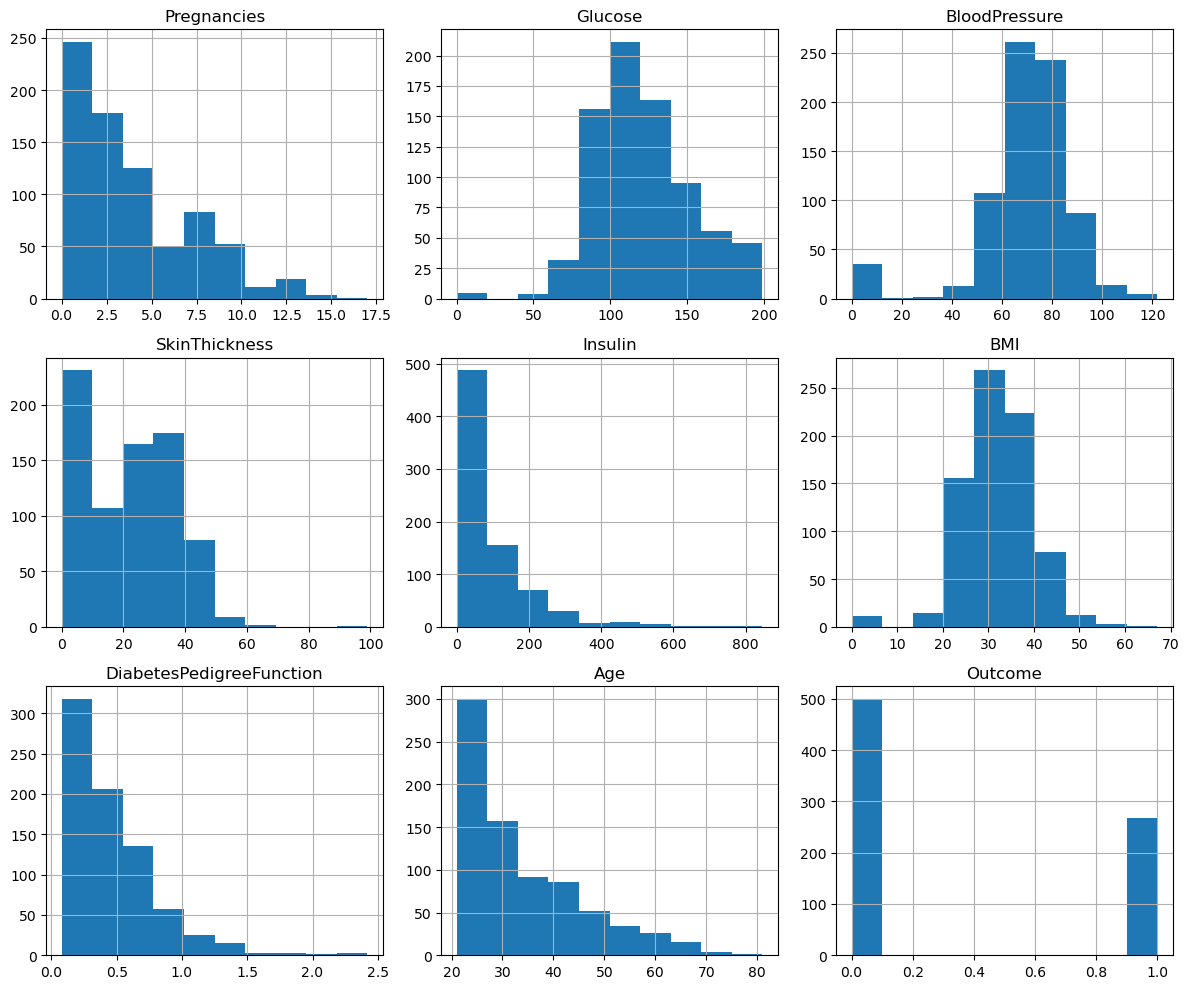

In [4]:
# Visualize the distribution of each variable using histograms
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

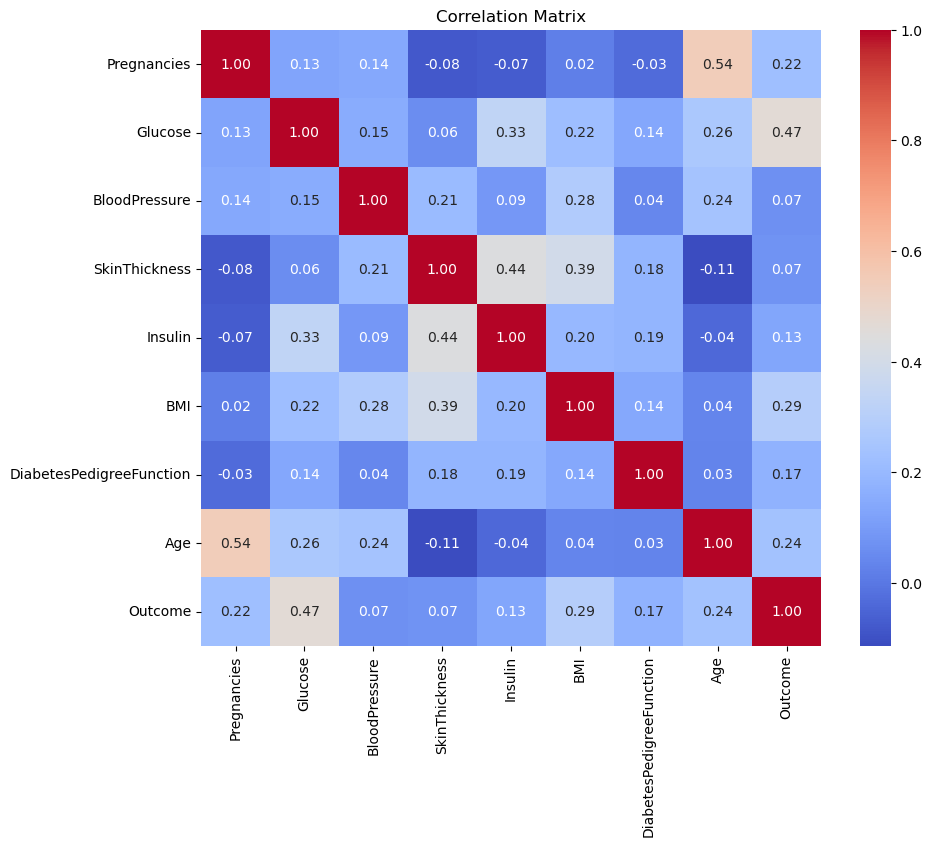

In [5]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categoricalvariables into dummy variables if necessary.

In [9]:
# Replace missing values in numerical columns with the mean of the column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])


In [6]:
# Check if there are any remaining missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

In [11]:
# Split the dataset into training set and test set
# We'll use 80% of the data for training and 20% for testing
# Set a random seed to ensure reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)


### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Usecross-validation to optimize the hyperparameters and avoid overfitting.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.7540450486472079


### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Accuracy: 0.7922077922077922
Precision: 0.7446808510638298
Recall: 0.6363636363636364
F1 Score: 0.6862745098039216


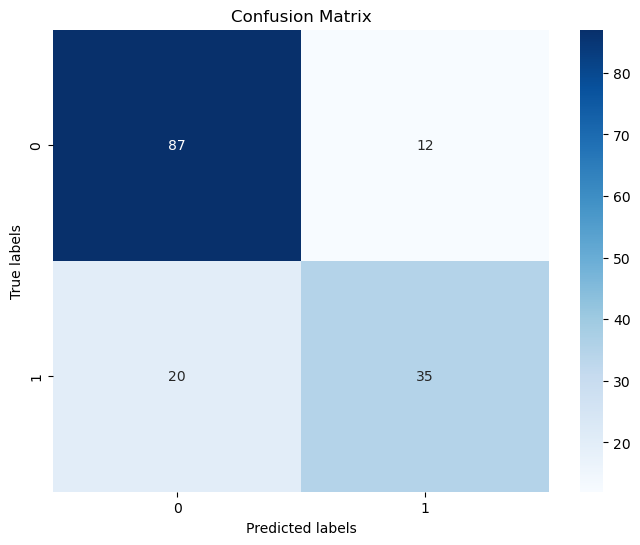

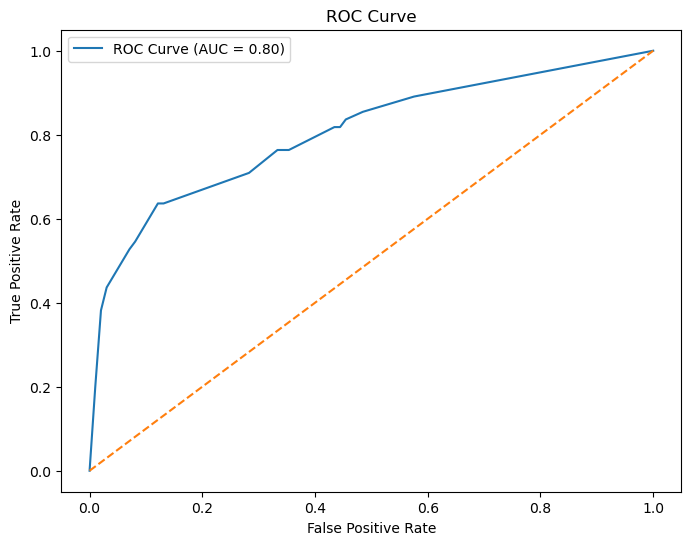

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve and calculate AUC score
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most importantvariables and their thresholds. Use domain knowledge and common sense to explain the patterns andtrends.

Ans:Interpreting the decision tree involves understanding the splits, branches, and leaves to identify the most important variables and their thresholds. Here's how you can interpret the decision tree model:

### Splits and Branches:

* Decision trees make splits at each node based on the feature that provides the best separation of the target classes.

* The splits continue until certain stopping criteria are met, such as reaching a maximum depth, minimum number of samples per leaf, or no further improvement in impurity reduction.

* Each split creates branches, leading to new nodes until reaching the terminal nodes (leaves).

### Thresholds:

* The decision tree model selects thresholds for continuous features that best separate the target classes.

 * For example, a decision might be based on whether a patient's glucose level is above or below a certain threshold.

### Important Variables:

* The importance of variables can be inferred from the number of times they are selected for splitting and the depth of the splits.

* Features higher up in the tree and closer to the root node are generally more important.

* By examining the splits and the impurity reduction associated with each split, you can identify which variables contribute most to the model's decision-making process.

### Domain Knowledge:

* Incorporating domain knowledge is crucial for interpreting the decision tree effectively.

* For example, in a diabetes prediction model, variables such as glucose levels, BMI, and age are often considered important predictors based on medical knowledge and prior research.

* Understanding how these variables interact and contribute to the model's decisions can provide valuable insights into the underlying patterns and trends in the data.

### Patterns and Trends:

* Look for consistent patterns and trends across different branches of the tree.

* Identify commonalities in the splits and thresholds that lead to specific outcomes (e.g., diabetic vs. non-diabetic).

* Consider how the decision tree captures interactions between variables and uncovers nonlinear relationships that might not be immediately apparent from the raw data.

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in thedataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty andrisks.

Ans: Validating the decision tree model involves testing its performance on new data or assessing its robustness to changes in the dataset or environment. Sensitivity analysis and scenario testing can help explore uncertainty and risks associated with the model. Here's how you can validate the decision tree model:

### Cross-Validation:

* Use techniques like k-fold cross-validation to assess the model's performance on multiple subsets of the data.

* Cross-validation helps estimate how well the model generalizes to unseen data and provides insights into its stability and reliability.

### Test on New Data:

* Collect additional data that was not used during training or validation.

* Apply the trained decision tree model to the new dataset and evaluate its performance metrics.

* If the model performs well on the new data, it suggests that the model has learned meaningful patterns and is capable of making accurate predictions in different contexts.

### Robustness Testing:


* Introduce changes to the dataset or environment to simulate different scenarios and assess how the model responds.

* For example, you can introduce noise or outliers, remove certain features, or change the distribution of the data.

* Evaluate the model's performance under these conditions and determine whether it remains stable and effective in making predictions.

### Sensitivity Analysis:

* Conduct sensitivity analysis by varying input parameters or assumptions to understand how changes impact the model's predictions.

* For decision trees, sensitivity analysis may involve adjusting hyperparameters such as maximum depth, minimum samples per leaf, or splitting criteria.

* Observe how changes in these parameters affect the model's performance metrics and decision boundaries.

### Scenario Testing:

* Define different scenarios or use cases that reflect real-world situations where the model will be deployed.

* Test the decision tree model under each scenario and assess its ability to handle diverse situations and make accurate predictions.

* Consider factors such as changes in patient demographics, shifts in disease prevalence, or variations in medical protocols.

### Interpretation and Feedback:

* Interpret the results of the validation and testing processes to identify areas where the model excels and areas where it may need improvement.

* Gather feedback from domain experts, stakeholders, and end-users to understand their perspectives on the model's performance and usability.

* Use insights gained from validation and testing to refine the model, improve its robustness, and address any limitations or weaknesses identified during the evaluation process.